# Исследование закономерностей, определяющих успешность игры

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy import stats as st
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
# импорт библиотек pandas, seaborn, matplotlib.pyplot, numpy, stats
%config InlineBackend.figure_format='svg'
import warnings
warnings.filterwarnings('ignore')

In [2]:
games_df = pd.read_csv('/Users/galina/Desktop/Яндекс.Практикум/Аналитик данных/Сборный 1/Новая версия/games.csv')
# чтение файла с данными и сохранение в games_df

In [3]:
def get_df_info(df):
    display(df.head(10))
    display(df.info())
    display(df.describe())
# создание функции для вывода характеристик датафрейма

In [4]:
get_df_info(games_df)
# применение функции get_df_info

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Стоит отметить проблемы в названиях колонок. Они должны быть записаны строчными буквами.

В столбцах `critic_score`, `user_score` и `rating` отсутствует почти половина данных.

Данные в `year_of_release` представлены типом float64, а в оценках пользователей `user_score` кроме числовых значений присутствуют значения типа "str".

### Вывод

В каждой строке таблицы - данные о продаже компьютерных игр за период до 2016 года. Часть колонок содержит информацию относительно характеристик игры: жанра, платформы, оценки пользователей и критиков, возрастного рейтинга. Другие данные подробнее знакомят нас с продажами в зависимости от регионов и стран.

В датафрейме есть значения с некорректным типом, а также пропуски в нескольких колонках. 

В первую очередь устраним проблемы в данных.

## Предобработка данных

### Замена названий столбцов 

Заменим прописные буквы в названиях столбцов на строчные.

In [5]:
games_df.columns = games_df.columns.str.lower()
# приведение символов к нижнему регистру

In [6]:
games_df.columns
# информация о названиях столбцов 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

###  Удаление дубликатов

In [7]:
print(games_df.duplicated().sum())
# подсчёт явных дубликатов

0


Явных дубликатов нет.

Проверим, есть ли среди названий игр неявные дубликаты. Одна и та же игра могла быть выпущена для разных платформ в разные годы. Поэтому для поиска повторов выделим срез данных со столбцами `name`, `platform`, `year_of_release`, `genre`.

In [8]:
games_df_duplicates = games_df[games_df[['name', 'platform', 'year_of_release', 'genre']].duplicated()]
games_df_duplicates
# поиск повторяющихся значений

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [9]:
games_df[(games_df['name'] == 'Madden NFL 13') & (games_df['platform'] == 'PS3')]
# получение среза данных

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Информация об игре "Madden NFL 13" была занесена в таблицу 2 раза. В одной из строк присутствует дополнительная информация о продажах в Европе. Чтобы не потерять данные, сохраним сумму продаж в Европе по этим двум стокам в отдельную переменную и после удаления дубликата обновим данные.

In [10]:
madden_nfl_13_sales = games_df.loc[16230, 'eu_sales'] + games_df.loc[604, 'eu_sales']
# сохранение в переменную суммы продаж

In [11]:
games_df[games_df['name'].isna()]
# получение среза данных

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Наблюдаем такую же ситуацию, как и с игрой "Madden NFL 13".

In [12]:
nan_sales = games_df.loc[14244, 'jp_sales'] + games_df.loc[659, 'jp_sales']
# сохранение в переменную суммы продаж

Удаляем неявные дубликаты.

In [13]:
games_df = games_df[~(games_df.index.isin(games_df_duplicates.index))]
# сохранение среза данных

In [14]:
games_df.loc[604, 'eu_sales'] = madden_nfl_13_sales
games_df.loc[659, 'jp_sales'] = nan_sales
# замена значений с помощью атрибута loc

In [15]:
games_df['platform'].unique()
# просмотр уникальных наименований платформ

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [16]:
games_df['platform'].value_counts()
# количество уникальных совпадений в колонке 'platform'

PS2     2161
DS      2151
PS3     1330
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       28
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [17]:
games_df['rating'].value_counts()
# количество уникальных совпадений в колонке 'rating'

E       3989
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Среди рейтингов ESRB есть устаревший рейтинг "K-A" ("Kids to Adults"). В данный момент его уже не используют. По своему описанию он соответствует рейтингу "E" ("Everyone"). Добавим игры с "K-A" в категорию "E".

In [18]:
games_df['rating'] = games_df['rating'].replace('K-A', 'E')
# замена рейтинга в столбце 'rating'

In [19]:
games_df['rating'].value_counts()
# проверка количества уникальных совпадений в колонке 'rating'

E       3992
T       2961
M       1563
E10+    1420
EC         8
RP         3
AO         1
Name: rating, dtype: int64

In [20]:
games_df['genre'].value_counts()
# количество уникальных совпадений в колонке 'genre'

Action          3369
Sports          2347
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

###  Заполнение пропусков

In [21]:
games_df.info()
# получение общей информации о данных в таблице games_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


In [22]:
games_df[games_df['name'].isna()].head()
# просмотр первых пяти строк с пропусками в столбце 'name'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.03,0.08,NaN,NaN,NaN


Пропуск в столбце `name` мог появиться в результате сбоя в автоматизированной системе сбора информации или на этапе выгрузки данных. Заменить его по имеющимся данным не получится, оставим как есть.

In [23]:
games_df[games_df['year_of_release'].isna()].head()
# просмотр первых пяти строк с пропусками в столбце 'year_of_release'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [24]:
games_df[games_df['year_of_release'].isna()].shape
# вызов атрибута shape с количеством строк и столбцов

(269, 11)

Пропущенные значения в `year_of_release` нельзя восстановить, так как они уникальны для каждой игры. Можно удалить такие строки, ведь их доля составляет 1.6% всех данных.

In [25]:
games_df = games_df[~(games_df['year_of_release'].isna())]
# сохранение среза данных

In [26]:
games_df[games_df['genre'].isna()].head()
# просмотр первых пяти строк с пропусками в столбце 'genre' 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.03,0.08,NaN,NaN,NaN


In [27]:
games_df[games_df['user_score'].isna()].head()
# просмотр первых пяти строк с пропусками в столбце 'user_score' 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [28]:
games_df['user_score'].unique()
# просмотр уникальных значений в столбце 'user_score'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В колонке с числовыми оценками пользователей встречается значение "tbd". Аббревиатура "tbd" или "to be determined" означает, что рейтинг игре пока не присвоен или будет определён позже, а пока значение не известно. Заменим такие значения на nan. 

In [29]:
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan)
# замена 'tbd' в столбце 'user_score' на nan

In [30]:
games_df['user_score'].unique()
# проверка уникальных значений в столбце 'user_score'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [31]:
games_df[games_df['critic_score'].isna()].head()
# просмотр первых пяти строк с пропусками в столбце 'critic_score'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Большинство пропусков присутствует в строках с играми, выпущенными в период с 1980 по 1997 гг. В то время рынок компьютерных игр только начал развиваться и не было системного подхода в оценке игр критиками, также как и не было возможностей по оперативному сбору информации об оценках пользователей.

In [32]:
games_df[games_df['rating'].isna()].head()
# просмотр первых пяти строк с пропусками в столбце 'rating'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [33]:
games_df.groupby('year_of_release')['rating'].count()
# подсчёт числа игр с присвоенным возрастным рейтингом

year_of_release
1980.0       0
1981.0       0
1982.0       0
1983.0       0
1984.0       0
1985.0       1
1986.0       0
1987.0       0
1988.0       1
1989.0       0
1990.0       0
1991.0       0
1992.0       2
1993.0       0
1994.0       1
1995.0       0
1996.0       7
1997.0      19
1998.0      32
1999.0      42
2000.0     148
2001.0     339
2002.0     655
2003.0     613
2004.0     598
2005.0     706
2006.0     678
2007.0     821
2008.0     981
2009.0    1011
2010.0     799
2011.0     703
2012.0     354
2013.0     316
2014.0     345
2015.0     315
2016.0     280
Name: rating, dtype: int64

Возрастной рейтинг "ESRB" начали присваивать играм с момента основания самой организации "ESRB" в 1994 г. Вероятно, данные за 1985, 1988 и 1992 гг. - это рейтинги, добавленные "ESRB" уже после начала деятельности ассоциации. Кроме того, "ESRB" специализируется на определении рейтингов преимущественно в США и Канаде.

Чтобы не потерять данные в ходе анализа и выделить их в отдельную группу, заменим пропущенные значения на "tbd".

In [34]:
games_df['rating'] = games_df['rating'].fillna('tbd')
# замена пропущенных значений

In [35]:
games_df.info()
# проверка общей информации о данных в таблице games_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Изменение типов данных

In [36]:
games_df.dtypes
# вызов атрибута dtypes с типами данных

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Переведём значения в столбце `year_of_release` в тип "int". Год должен выражаться целым числом. 

А `user_score` больше не содержит строки и может быть преобразован в тип "float".

In [37]:
games_df['year_of_release'] = games_df['year_of_release'].astype('int')
# перевод данных в тип int методом astype 

In [38]:
games_df['user_score'] = games_df['user_score'].astype('float')
# перевод данных в тип float методом astype

In [39]:
games_df.dtypes
# проверка типов данных после изменения

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

## Добавление в таблицу новых столбцов

In [40]:
games_df['total_sales'] = (games_df['na_sales'] 
                           + games_df['eu_sales'] 
                           + games_df['jp_sales'] 
                           + games_df['other_sales'])
# подсчёт глобальных продаж 

In [41]:
games_df.head()
# обзор первых 5 строк таблицы, проверка новых колонок

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,tbd,31.38


## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

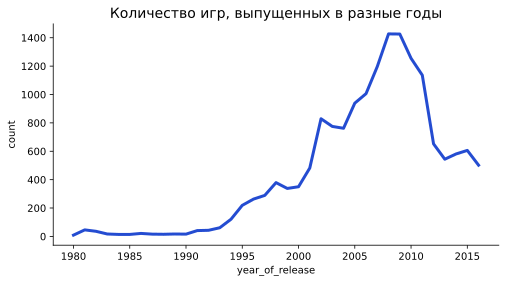

In [42]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
(games_df
     .pivot_table(index='year_of_release',
                  values='platform',
                  aggfunc='count').reset_index()
     .plot(x='year_of_release', 
           y='platform', 
           kind='line', 
           color='#244cd1', 
           legend=False, 
           ax=ax1,
           linewidth=3)
)
plt.title('Количество игр, выпущенных в разные годы', fontsize=14)
plt.ylabel('count')

plt.show()
# вывод графика с информацией о количестве игр, выпущенных в разные годы

В период с 1980 до 1990 гг. рынок игр начал своё постепенное развитие, стали появляться домашние компьютеры и специалисты в области разработки. Уже были популярны игровые консоли и аркадные игры. В конце 1989 г. после выпуска игровой системы "GameBoy" зародился рынок портативных консолей. 

На графике видно, что **с 1997 г.** количество выпускаемых игр **начинает активно расти** и достигает пика к 2009 г.. В этот промежуток времени стали внедряться "CD-ROM" для хранения данных, а также новые операционные системы. Большее распространение получил интернет. Набирает популярность рынок мобильных игр с того момента, когда вышел телефон "Nokia" с игрой "Snake".

**Падение** числа выпущенных игр **после 2009 г.** можно связать с последствиями кризиса 2008 г., также как и с нарастающей популярностью мобильных игр и появлением облачных и "VR" технологий. При этом, постепенно начала сменяться парадигма в пользу качества игр, а не их количества.

In [43]:
platform_total_sales = games_df.pivot_table(index='year_of_release',
                                            columns='platform',
                                            values='total_sales', 
                                            aggfunc='sum')
# создание сводной таблицы с суммой глобальных продаж в зависимости от года и платформы

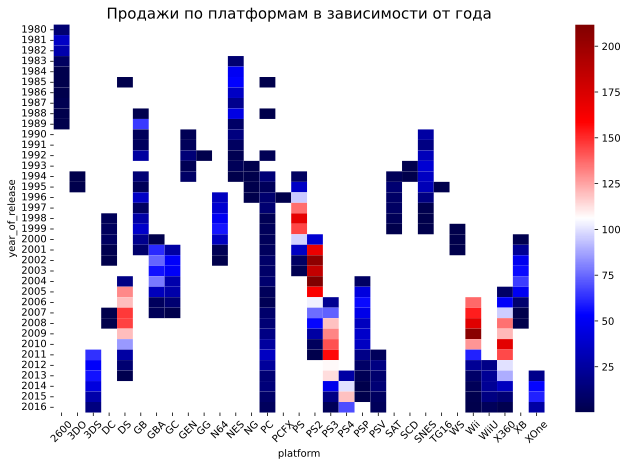

In [44]:
fig = plt.figure(figsize=(11, 7))
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(platform_total_sales, ax=ax1, cmap='seismic')
plt.title('Продажи по платформам в зависимости от года', fontsize=15)
plt.xticks(rotation = 45)

plt.show()
# построение тепловой карты

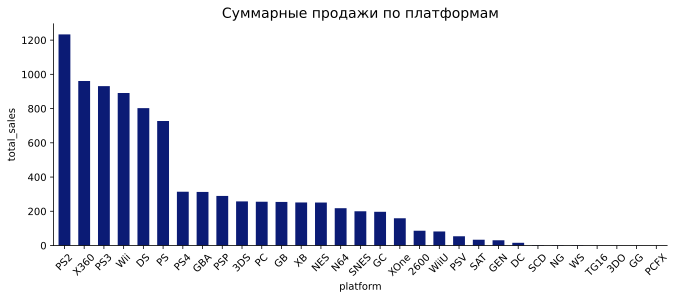

In [45]:
fig = plt.figure(figsize=(11, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
(games_df
     .pivot_table(index='platform',
                  values='total_sales',
                  aggfunc='sum')
     .sort_values(by='total_sales', ascending=False)
     .plot(y='total_sales', 
           kind='bar', 
           color='#0b1b75', 
           legend=False, 
           ax=ax1,
           width=0.6)
)
plt.title('Суммарные продажи по платформам', fontsize=14)
plt.ylabel('total_sales')
plt.xticks(rotation = 45)

plt.show()
# построение столбчатой диараммы с зависимостью суммарных продаж от платформы

In [46]:
sales_top_list = (games_df
     .pivot_table(index='platform',
                  values='total_sales',
                  aggfunc='sum')
     .sort_values(by='total_sales', 
                  ascending=False)
     .head(6).index.to_list()
)
sales_top_list
# создание списка "Топ-6" платформ с наибольшими суммарными продажами 

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

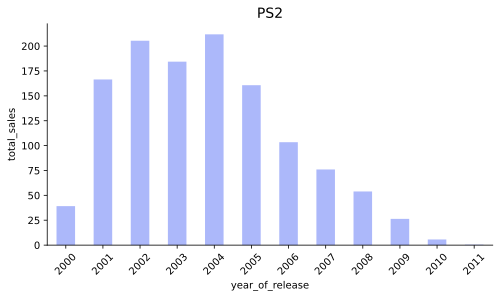

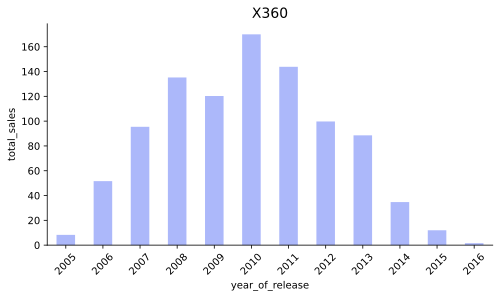

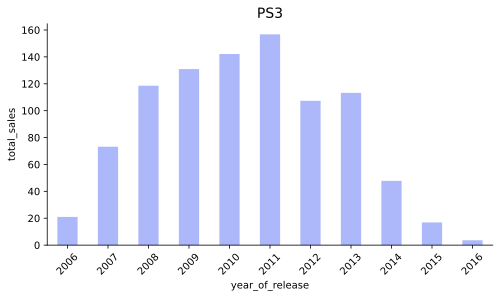

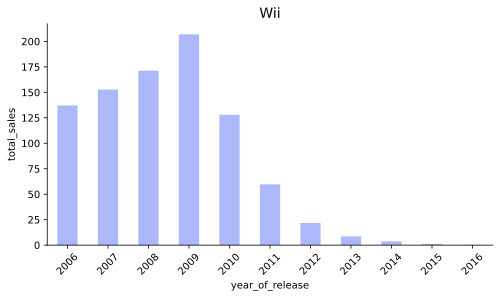

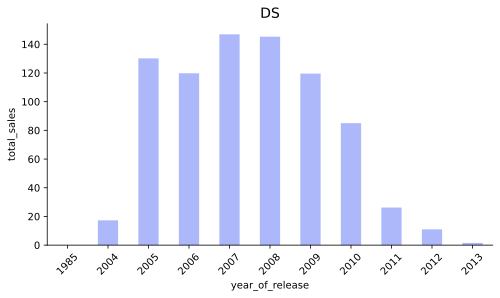

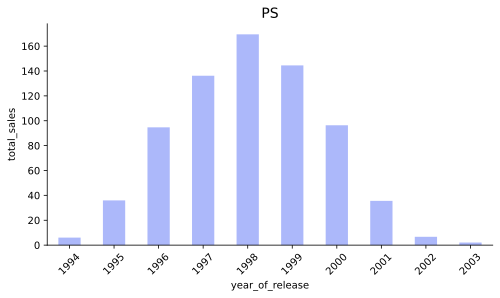

In [47]:
for name in sales_top_list:
    fig = plt.figure(figsize=(8, 4))
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    (games_df[games_df['platform'] == name]
         .pivot_table(index='year_of_release',
                      values='total_sales',
                      aggfunc='sum')
         .plot(y='total_sales', 
               kind='bar', 
               color='#acb8fa', 
               legend=False, 
               ax=ax1)
    )
    plt.title(name, fontsize=14)
    plt.ylabel('total_sales')
    plt.xticks(rotation = 45)

    plt.show()
# построение столбчатых диаграмм с суммарными продажами по годам для разных платформ с использованием цикла

По суммарным глобальным продажам за всё время лидируют 6 платформ: **"PS2", "X360", "PS3", "Wii", "DS" и "PS"**. В частности, для платформы "PS2" было продано *1.2 млрд.* копий по всему миру.

Однако, на тепловой карте видно, что в последние годы "PS2", "Wii", "PS" и "DS" уже потеряли свою популярность. "PS3" и "X360" также становятся менее востребованными. Крупные производители начинают выпускать обновлённые версии своих платформ уже через 6-7 лет после выпуска предыдущих версий. Из этого можно сделать вывод, что **"жизненный срок"** платформы составляет примерно **от 9 до 11 лет**. 

За **актуальный период** можно взять **данные с 2013 по 2016 гг.**. Поскольку после выхода платформы на рынок расцвет её продаж приходится на 5-6 год, следует рассмотреть срез данных по платформам, которые в 2013 году начали приобретать популярность. Например, платформа "PS4" может достичь пика продаж приблизительно к 2017-2018 г..

Какие платформы лидируют по продажам, растут или падают?

In [48]:
actual_games_df = games_df.query('year_of_release > 2012')
# получение среза актуальных данных

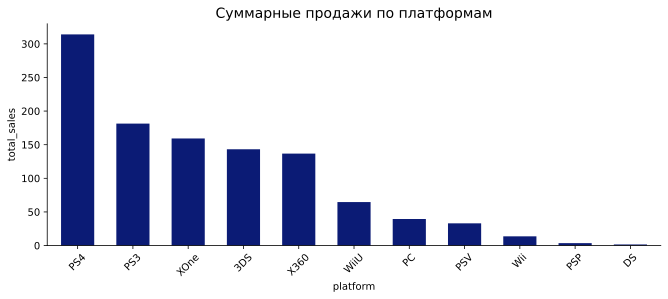

In [49]:
fig = plt.figure(figsize=(11, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
(actual_games_df
     .pivot_table(index='platform',
                  values='total_sales',
                  aggfunc='sum')
     .sort_values(by='total_sales', ascending=False)
     .plot(y='total_sales', 
           kind='bar', 
           color='#0b1b75', 
           legend=False, 
           ax=ax1,
           width=0.6)
)
plt.title('Суммарные продажи по платформам', fontsize=14)
plt.ylabel('total_sales')
plt.xticks(rotation = 45)

plt.show()
# построение столбчатой диараммы с зависимостью суммарных продаж от платформы по актуальным данным

In [50]:
actual_platform_list = list(actual_games_df['platform'].unique())
print(actual_platform_list)
# создание списка с уникальными названиями платформ с наибольшими суммарными продажами по актуальным данным
top_actual_platform_list = (actual_games_df
                            .pivot_table(index='platform',
                                         values='total_sales',
                                         aggfunc='sum')
                            .sort_values(by='total_sales', ascending=False).head(6).index.to_list()
                           )
print(top_actual_platform_list)
# создание списка "Топ-6" платформ с наибольшими суммарными продажами по актуальным данным

['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV', 'DS', 'PSP']
['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU']


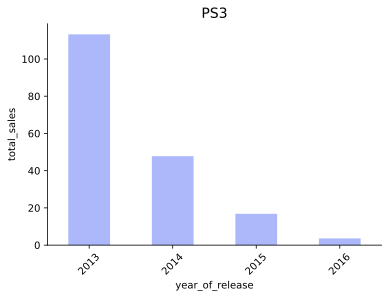

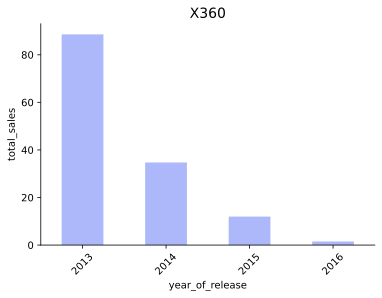

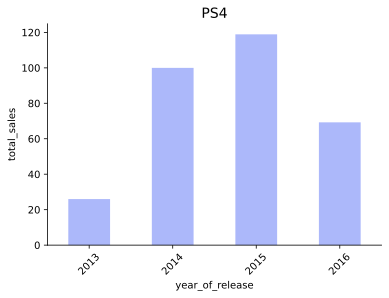

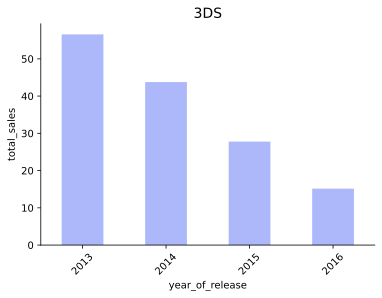

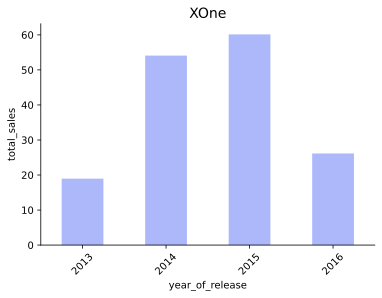

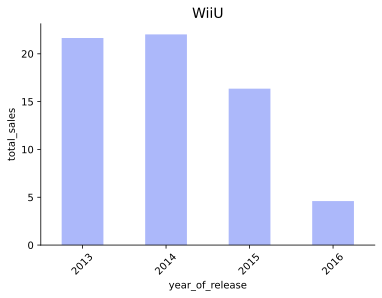

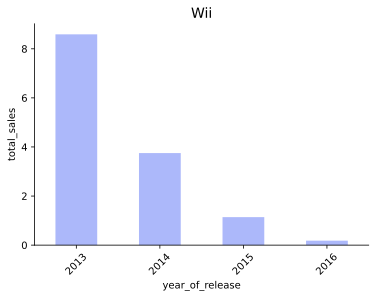

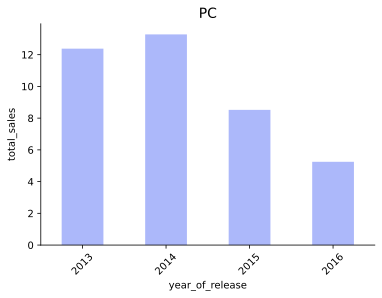

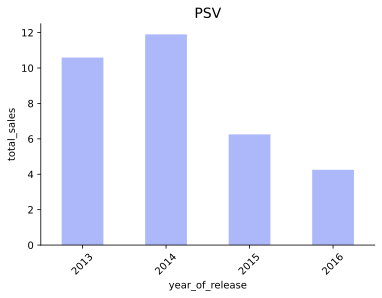

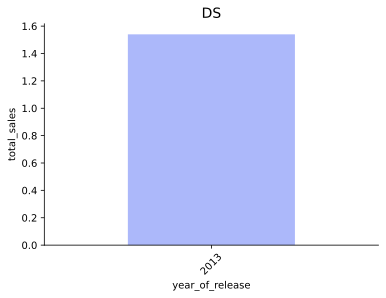

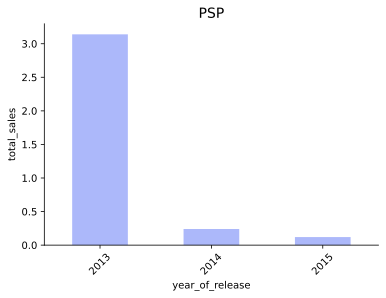

In [51]:
for name in actual_platform_list:
    fig = plt.figure(figsize=(6, 4))
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    (actual_games_df[actual_games_df['platform'] == name]
         .pivot_table(index='year_of_release',
                      values='total_sales',
                      aggfunc='sum')
         .plot(y='total_sales', 
               kind='bar', 
               color='#acb8fa', 
               legend=False, 
               ax=ax1)
    )
    plt.title(name, fontsize=14)
    plt.ylabel('total_sales')
    plt.xticks(rotation = 45)

    plt.show()
# построение столбчатых диаграмм с суммарными продажами по годам для разных платформ по актуальным данным

Потенциально прибыльными можно назвать платформы **"PS4" и "XOne"**. Они постепенно стали вытеснять платформы предыдущего поколения. Их суммарные продажи за 3 года составляют *474 млн. копий*.

Платформы "PSP", "DS", "PS3" и "Wii" уже практически изжили себя.

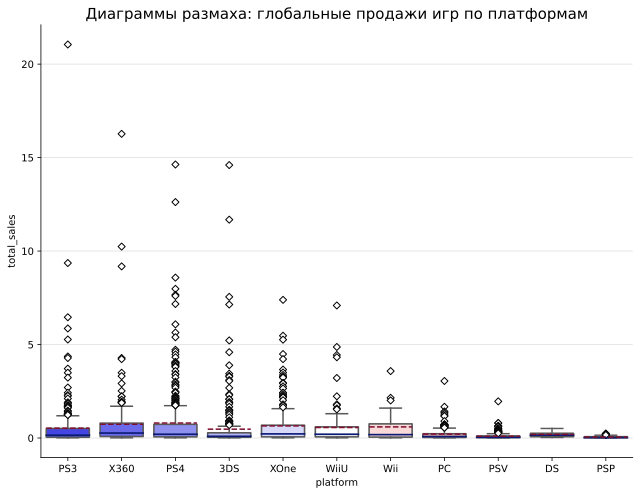

In [52]:
fig = plt.figure(figsize=(9,7))
ax1 = fig.add_subplot(1,1,1)
ax1.set_title('Диаграммы размаха: глобальные продажи игр по платформам', fontsize=15)
ax1.grid(which='major', linewidth=1, color='gray', alpha=0.2)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
sns.boxplot(x='platform',
            y='total_sales', 
            data=actual_games_df, 
            ax=ax1,
            showmeans=True,
            meanline=True,
            medianprops=dict(linewidth=1.7, 
                             color='#0b1b75'),
            flierprops=dict(marker='D', 
                            markerfacecolor='white', 
                            markeredgecolor='black', 
                            linewidth=3),
            boxprops=dict(linewidth=1.6),
            meanprops=dict(linewidth=1.5, 
                           color='#800f2f'),
            palette='bwr')

plt.tight_layout()
plt.show()
# построение диаграмм размаха: глобальные продажи игр по платформам

На диаграмах размаха для каждой платформы можно увидеть единичные выбросы (игры с рекордными продажами). Например, игра "Grand Theft Auto V" для платформы "PS3" разошлась по миру в количестве 21 млн. проданных копий. Именно такие игры влияют на средние показатели продаж, смещая их вверх.

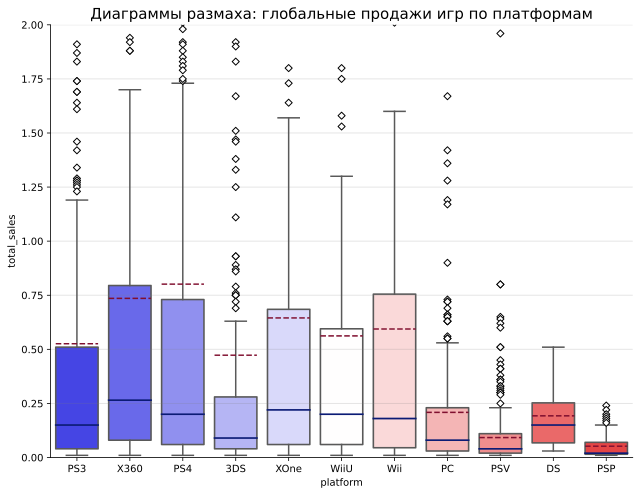

In [53]:
fig = plt.figure(figsize=(9,7))
ax1 = fig.add_subplot(1,1,1)
ax1.set_title('Диаграммы размаха: глобальные продажи игр по платформам', fontsize=15)
ax1.grid(which='major', linewidth=1, color='gray', alpha=0.2)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
sns.boxplot(x='platform',
            y='total_sales', 
            data=actual_games_df, 
            ax=ax1,
            showmeans=True,
            meanline=True,
            medianprops=dict(linewidth=1.7, 
                             color='#0b1b75'),
            flierprops=dict(marker='D', 
                            markerfacecolor='white', 
                            markeredgecolor='black', 
                            linewidth=3),
            boxprops=dict(linewidth=1.6),
            meanprops=dict(linewidth=1.5, 
                           color='#800f2f'),
            palette='bwr').set(ylim=(0, 2))

plt.tight_layout()
plt.show()
# построение диаграмм размаха: глобальные продажи игр по платформам

Самое большое медианное значение продаж у платформы "X360" - **270 тыс. копий**, существующей на рынке с 2006 г. Далее идут платформы "XOne" и "WiiU". 

В то же время, специфику рынка игр отражает большая разница между медианными и средними значениями. Это можно объяснить наличием **самых продаваемых и популярных игр** на рынке, которые могут перевыпускаться для разных платформ и продаваться в течение длительного периода времени. В данной выборке больше всего таких игр у платформ **"PS4" и "X360"**.

Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?

In [54]:
def print_total_sales_and_scores_correlations(platform_name, ylim=[0, 5]):
    fig = plt.figure(figsize=(12, 5))
    fig.suptitle(platform_name, fontsize=14)
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_ylim(ylim)
    ax1.set_title('Разброс оценок критиков', fontsize=14)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_ylim(ylim)
    ax2.set_title('Разброс оценок пользователей', fontsize=14)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    sns.scatterplot(y='total_sales', 
                    x='critic_score', 
                    data=actual_games_df[actual_games_df['platform'] == platform_name], 
                    color='#0b1b75', 
                    ax=ax1)
    sns.scatterplot(y='total_sales', 
                    x='user_score', 
                    data=actual_games_df[actual_games_df['platform'] == platform_name], 
                    color='#800f2f', 
                    ax=ax2)
    plt.ylabel('total_sales')

    plt.tight_layout()
    return plt.show()
# создание функции для построения диаграмм рассеяния

def count_total_sales_and_scores_correlations(platform_name):     
    correlation_critic_score = actual_games_df[actual_games_df['platform'] == platform_name]['critic_score'].corr(actual_games_df[actual_games_df['platform'] == platform_name]['total_sales'])
    correlation_user_score = actual_games_df[actual_games_df['platform'] == platform_name]['user_score'].corr(actual_games_df[actual_games_df['platform'] == platform_name]['total_sales'])
    print(f'Корреляция между оценками критиков и глобальными продажами для платформы {platform_name}: {round(correlation_critic_score, 3)}')
    print(f'Корреляция между оценками пользователей и глобальными продажами для платформы {platform_name}: {round(correlation_user_score, 3)}')
# создание функции для подсчёта корреляций    

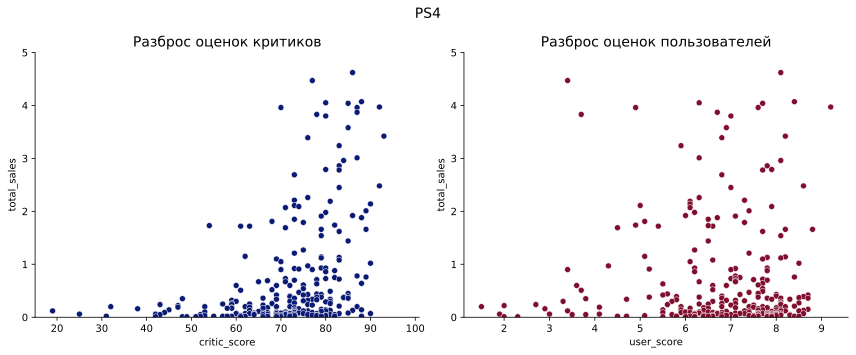

Корреляция между оценками критиков и глобальными продажами для платформы PS4: 0.407
Корреляция между оценками пользователей и глобальными продажами для платформы PS4: -0.032


In [55]:
print_total_sales_and_scores_correlations('PS4')
count_total_sales_and_scores_correlations('PS4')
# применение функций для платформы "PS4"  

Корреляция между оценками пользователей и глобальными продажами для платформы "PS4" отсутствует, а **корреляция с оценками критиков - умеренная**.

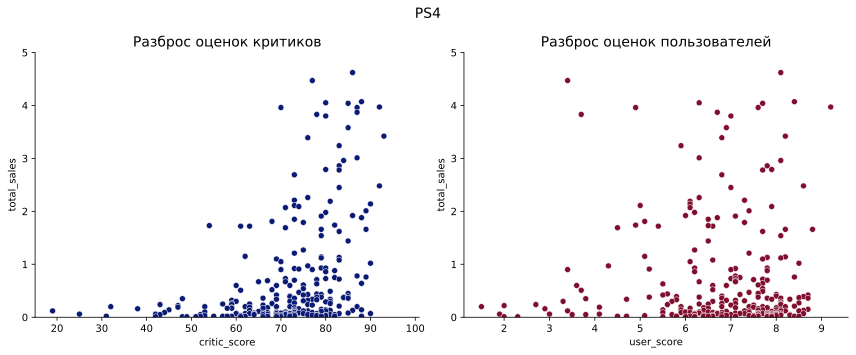

Корреляция между оценками критиков и глобальными продажами для платформы PS4: 0.407
Корреляция между оценками пользователей и глобальными продажами для платформы PS4: -0.032


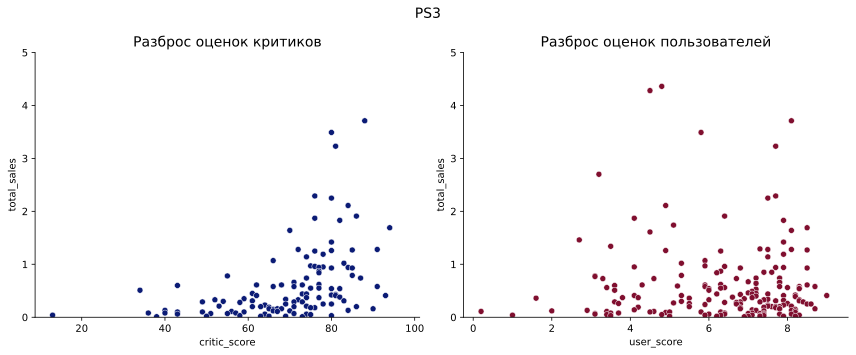

Корреляция между оценками критиков и глобальными продажами для платформы PS3: 0.334
Корреляция между оценками пользователей и глобальными продажами для платформы PS3: 0.002


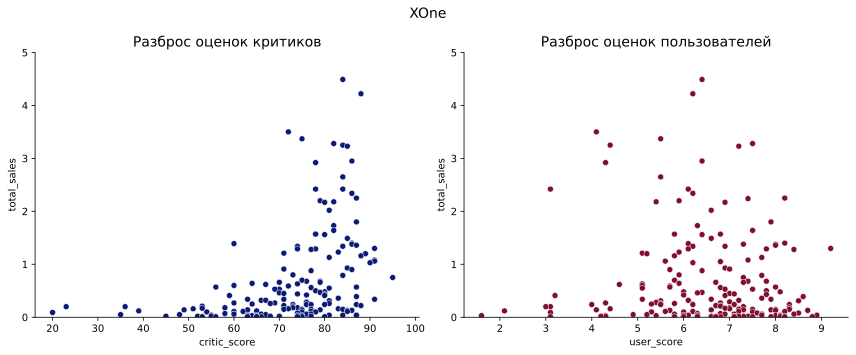

Корреляция между оценками критиков и глобальными продажами для платформы XOne: 0.417
Корреляция между оценками пользователей и глобальными продажами для платформы XOne: -0.069


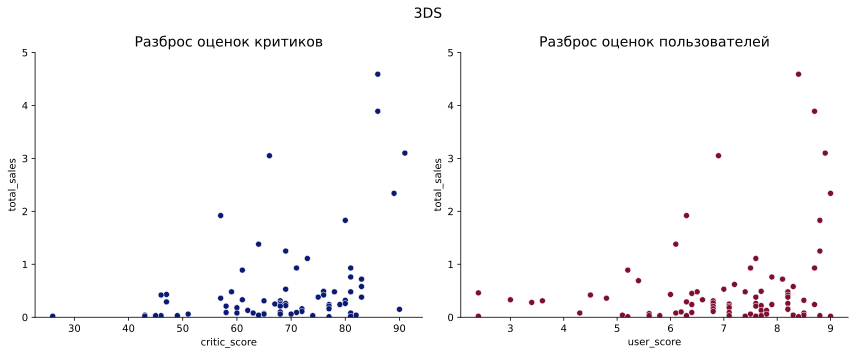

Корреляция между оценками критиков и глобальными продажами для платформы 3DS: 0.357
Корреляция между оценками пользователей и глобальными продажами для платформы 3DS: 0.242


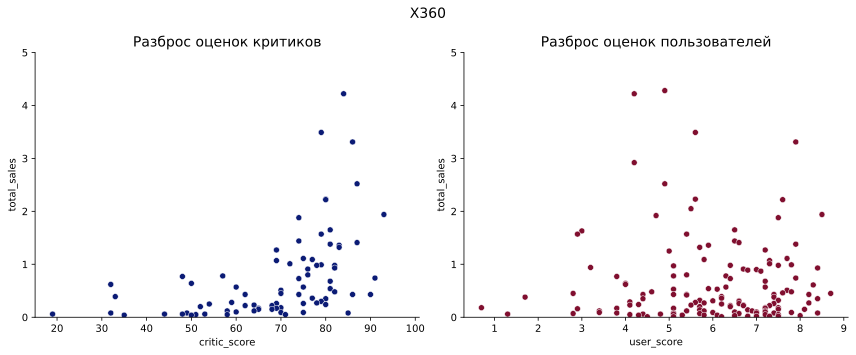

Корреляция между оценками критиков и глобальными продажами для платформы X360: 0.35
Корреляция между оценками пользователей и глобальными продажами для платформы X360: -0.012


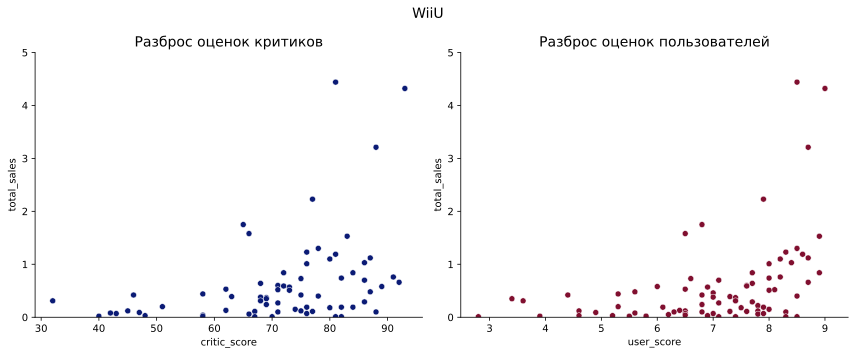

Корреляция между оценками критиков и глобальными продажами для платформы WiiU: 0.376
Корреляция между оценками пользователей и глобальными продажами для платформы WiiU: 0.419


In [56]:
for name in top_actual_platform_list:
    print_total_sales_and_scores_correlations(name)
    count_total_sales_and_scores_correlations(name)
# применение функций для "Топ-6" платформ по глобальным продажам 

У всех платформ наблюдается **умеренная корреляция между оценками критиков и глобальными продажами**, а корреляция с оценками пользователей отсутствует. Возможно некоторые покупатели игр прислушиваются к мнению критиков. 

Единственное исключение - платформа "WiiU". Для неё корреляция продаж с оценками пользователей равна 0.419.

In [57]:
genres_df = (actual_games_df
             .pivot_table(index='genre', values='total_sales', aggfunc='sum')
            )
genres_df
# создание сводной таблицы с суммой продаж по жанрам

,total_sales
genre,
Action,321.87
Adventure,23.64
Fighting,35.31
Misc,62.82
Platform,42.63
Puzzle,3.17
Racing,39.89
Role-Playing,145.89
Shooter,232.98


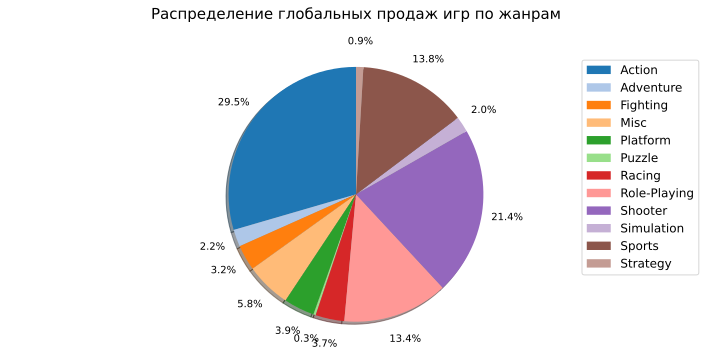

In [58]:
fig1, ax1 = plt.subplots(figsize=(10, 5))
fig1.suptitle('Распределение глобальных продаж игр по жанрам', fontsize=15)
palette_color = sns.color_palette('tab20')
ax1.pie(x=genres_df['total_sales'],
        colors=palette_color, 
        autopct='%.1f%%', 
        startangle=90, 
        shadow=True, 
        pctdistance=1.2, 
        labels=None)
ax1.axis('equal')
plt.legend(labels=genres_df.index, loc='upper right', fontsize=12)
plt.tight_layout()

plt.show()
# построение круговой диаграммы с долей продаж в зависимости от жанра

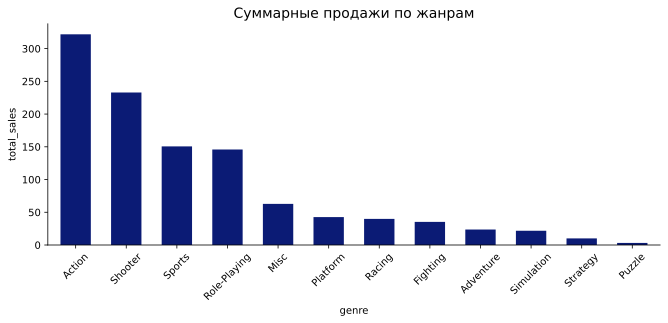

In [59]:
fig = plt.figure(figsize=(11, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
(genres_df
     .sort_values(by='total_sales', ascending=False)
     .plot(y='total_sales', 
           kind='bar', 
           color='#0b1b75', 
           legend=False, 
           ax=ax1,
           width=0.6)
)
plt.title('Суммарные продажи по жанрам', fontsize=14)
plt.ylabel('total_sales')
plt.xticks(rotation = 45)

plt.show()
# построение столбчатой диаграммы: суммарные продажи по жанрам

In [60]:
genres_df_mean = (actual_games_df
                      .pivot_table(index='genre', 
                                   values='total_sales', 
                                   aggfunc=['median', 'mean'])
                 )
genres_df_mean.columns = ['median_sales', 'mean_sales']
genres_df_mean['median_sales'] = round(genres_df_mean['median_sales'], 2)
genres_df_mean['mean_sales'] = round(genres_df_mean['mean_sales'], 2)
genres_df_mean
# создание сводной таблицы с медианной и средней суммой продаж по жанрам

,median_sales,mean_sales
genre,,
Action,0.11,0.42
Adventure,0.03,0.10
Fighting,0.12,0.44
Misc,0.10,0.41
Platform,0.22,0.58
Puzzle,0.06,0.19
Racing,0.12,0.47
Role-Playing,0.12,0.50
Shooter,0.45,1.25


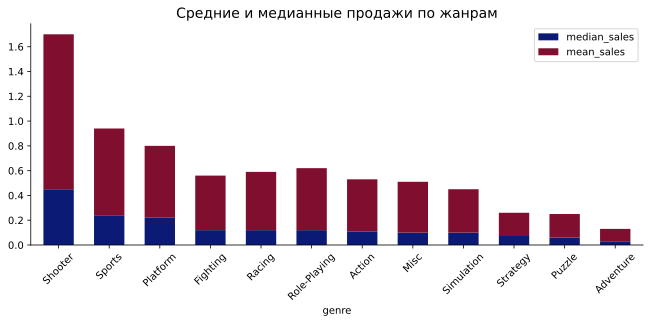

In [61]:
fig = plt.figure(figsize=(11, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
(genres_df_mean
     .sort_values(by='median_sales', ascending=False)
     .plot(kind='bar', 
           color=['#0b1b75', '#800f2f'], 
           legend=True, 
           ax=ax1,
           width=0.6,
           stacked=True)
)
plt.title('Средние и медианные продажи по жанрам', fontsize=14)
plt.xticks(rotation = 45)

plt.show()
# построение столбчатой диаграммы: медианные и средние продажи по жанрам

Если рассматривать суммарные продажи, почти 1/3 рынка игр составляют **игры жанра "Action"**. Кроме того, самыми прибыльными жанрами являются шутеры, спортивные и ролевые игры. Игры жанра "Puzzle" продаются хуже всего. Шутеры и экшен-игры чаще привлекают геймеров своей визуальной и эмоциональной атмосферой, возможностью взаимодействовать в команде.

Однако, если учитывать медианные значения продаж, то на первое место выходят **шутеры** с показателем 450 тыс. копий на одну игру жанра. В тройку лидеров по медианным продажам также входят **спортивные игры и игры жанра "Платформер"**. При этом игры жанра "Action" занимают только лишь 7 место в рейтинге. Из-за присутствия в выборке игр-бестселлеров суммарные продажи отдельного жанра могут выглядеть высокими, в отличие от медианного показателя продаж на одну игру.

## Портрет пользователя каждого региона

In [62]:
def print_local_df(region, feature):
    local_df = (actual_games_df
                .pivot_table(index=feature, values=region, aggfunc='sum')
                .sort_values(by=region, ascending=False).head(5)
               )

    fig1, ax1 = plt.subplots(figsize=(8, 4))
    fig1.suptitle(f'Распределение продаж игр: {feature}, {region}', fontsize=15)
    palette_color = sns.color_palette('tab20')
    ax1.pie(x=local_df[region],
            colors=palette_color, 
            autopct='%.1f%%', 
            startangle=90, 
            shadow=True, 
            pctdistance=1.2, 
            labels=None)
    ax1.axis('equal')
    plt.legend(labels=local_df.index, loc='upper right', fontsize=12)
    plt.tight_layout()

    return plt.show()
# создание функции для построения круговых диаграмм

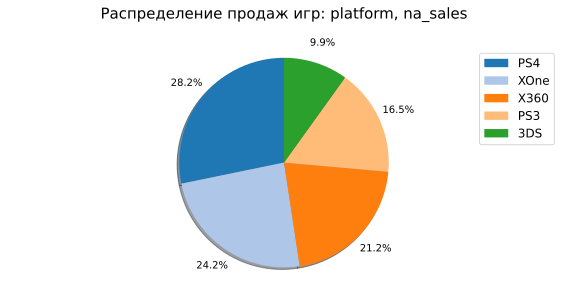

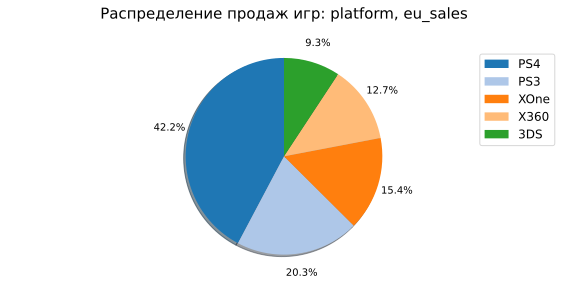

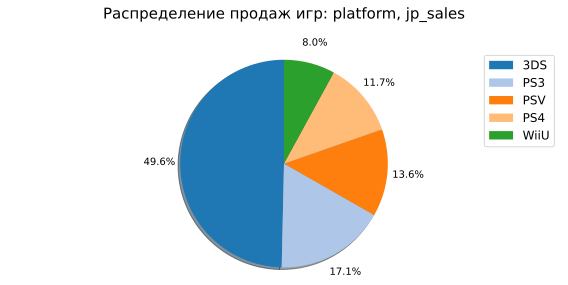

In [63]:
local_list = ['na_sales', 'eu_sales', 'jp_sales']
for region in local_list:
    print_local_df(region, 'platform')
# применение функции для построения круговых диаграмм с долями продаж по платформам и в зависимости от региона

В Северной Америке и Европе чаще покупают игры на платформы от Microsoft ("XOne", "X360") и Sony Electronics ("PS3", "PS4"). При этом чаще покупатели **в Северной Америке** отдают предпочтение  **Microsoft** (45% от продаж), а **в Европе** популярнее продукция **Sony Electronics** (62% от продаж).

На **японском рынке** ситуация другая. Там доминируют платформы от местного производителя **Nintendo** (58% от продаж).  

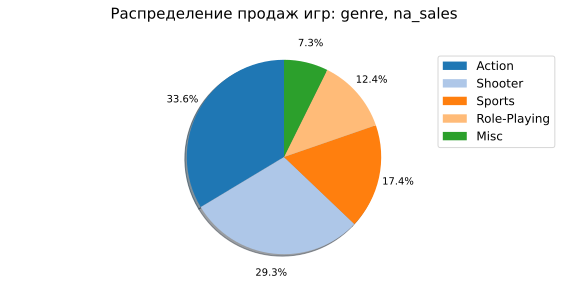

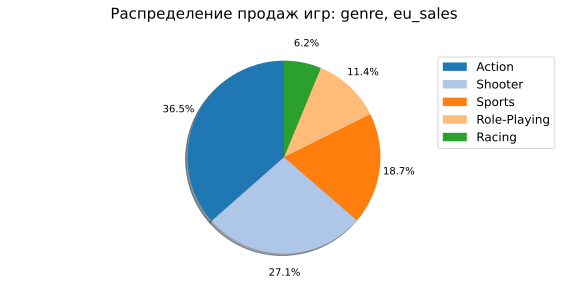

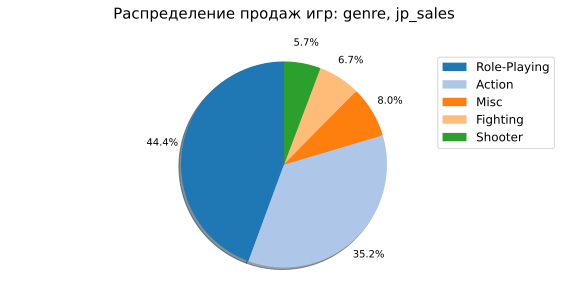

In [64]:
local_list = ['na_sales', 'eu_sales', 'jp_sales']
for region in local_list:
    print_local_df(region, 'genre')
# применение функции для построения круговых диаграмм с долями продаж по жанрам и в зависимости от региона

Топ европейских жанров в целом похож на пятёрку самых распространённых жанров в Северной Америке: **экшен-игры, шутеры, спортивные и ролевые игры**. Единтсвенным отличием является наличие в американском "Топ-5" жанра "Misc", а в европейском - жанра гонок "Racing".

В Японии 44% рынка занимают **ролевые игры**. На втором месте жанр "Action". На шутеры приходится всего 5.7% от продаж.

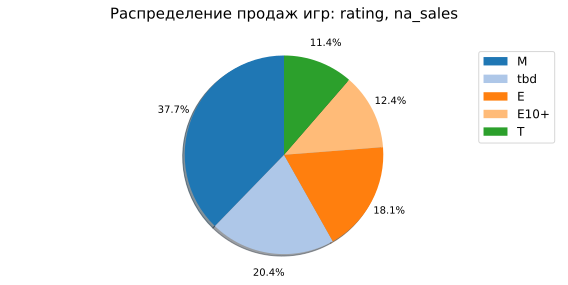

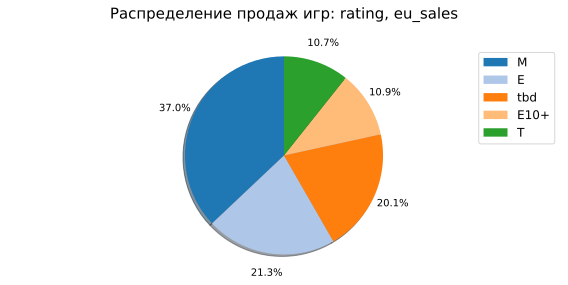

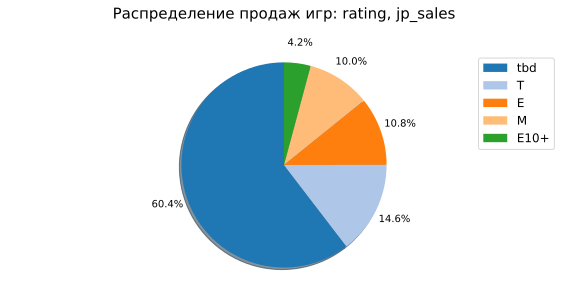

In [65]:
for region in local_list:
    local_df = (actual_games_df
                .pivot_table(index='rating', values=region, aggfunc='sum')
                .sort_values(by=region, ascending=False)
               )

    fig1, ax1 = plt.subplots(figsize=(8, 4))
    fig1.suptitle(f'Распределение продаж игр: rating, {region}', fontsize=15)
    palette_color = sns.color_palette('tab20')
    ax1.pie(x=local_df[region],
            colors=palette_color, 
            autopct='%.1f%%', 
            startangle=90, 
            shadow=True, 
            pctdistance=1.2, 
            labels=None)
    ax1.axis('equal')
    plt.legend(labels=local_df.index, loc='upper right', fontsize=12)
    plt.tight_layout()

    plt.show()
# построение круговых диаграмм с долями продаж по рейтингам и в зависимости от региона

В **Европе и Северной Америке** востребованы игры **для взрослой аудитории** (рейтинг 17+ "M"). 

На круговой диаграмме заметно, что **в Японии** 60% от продаж отводится играм **без рейтинга**. Дело в том, что в Японии возрастными рейтингами занимается некоммерческая организация "CERO", и поэтому точно оценить "Топ-5" возрастных рейтингов не получится. 

## Проверка гипотез

Проверим гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [66]:
xone_df = actual_games_df[(actual_games_df['platform'] == 'XOne') & (~(actual_games_df['user_score'].isna()))]
pc_df = actual_games_df[(actual_games_df['platform'] == 'PC') & (~(actual_games_df['user_score'].isna()))]
# создание таблиц с данными по платформам "XOne" и "PC"

In [67]:
print(xone_df['user_score'].describe())
print(f'Дисперсия равна: {round(np.var(xone_df["user_score"]), 3)}')
print(f'Стандартное отклонение равно: {round(np.std(xone_df["user_score"]), 3)}')
# подсчёт описательной статистики для "XOne"

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64
Дисперсия равна: 1.897
Стандартное отклонение равно: 1.377


In [68]:
print(pc_df['user_score'].describe())
print(f'Дисперсия равна: {round(np.var(pc_df["user_score"]), 3)}')
print(f'Стандартное отклонение равно: {round(np.std(pc_df["user_score"]), 3)}')
# подсчёт описательной статистики для "PC"

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64
Дисперсия равна: 3.016
Стандартное отклонение равно: 1.737


Исходя из H0 формулируется альтернативная гипотеза H1. Это утверждение, которое принимается верным, если отбрасывается H0.  

*Нулевая гипотеза (H0)*: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

*Альтернативная гипотеза (H1)*: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Нужно сравнить средние двух генеральных совокупностей между собой. Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам есть **t-тест** ("t-критерий Стьюдента"). Выборки для t-теста схожи по размеру (значений >50). Нет оснований полагать, что дисперсии генеральных совокупностей разные.

In [69]:
alpha = 0.01
# выбор уровня статистической значимости

In [70]:
results = st.ttest_ind(xone_df['user_score'], pc_df['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
# проверка гипотезы   

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Проверим гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [71]:
action_df = actual_games_df[(actual_games_df['genre'] == 'Action') & (~(actual_games_df['user_score'].isna()))]
sports_df = actual_games_df[(actual_games_df['genre'] == 'Sports') & (~(actual_games_df['user_score'].isna()))]
# создание таблиц с данными по жанрам "Action" и "Sports"

In [72]:
print(action_df['user_score'].describe())
print(f'Дисперсия равна: {round(np.var(action_df["user_score"]), 3)}')
print(f'Стандартное отклонение равно: {round(np.std(action_df["user_score"]), 3)}')
# подсчёт описательной статистики для "Action"

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64
Дисперсия равна: 1.765
Стандартное отклонение равно: 1.328


In [73]:
print(sports_df['user_score'].describe())
print(f'Дисперсия равна: {round(np.var(sports_df["user_score"]), 3)}')
print(f'Стандартное отклонение равно: {round(np.std(sports_df["user_score"]), 3)}')
# подсчёт описательной статистики для "Sports"

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64
Дисперсия равна: 3.161
Стандартное отклонение равно: 1.778


*Нулевая гипотеза (H0)*: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

*Альтернативная гипотеза (HA)*: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [74]:
results = st.ttest_ind(sports_df['user_score'], action_df['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
# проверка гипотезы    

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


## Общий вывод

С момента появления первых аркад мировой рынок игр постоянно претерпевал изменения. С 1980 до 1990 гг. происходило постепенное развитие игровых жанров, новые производители платформ выходили на рынок. Рост числа выпускаемых игр наряду с расширением технических возможностей операционных систем и интернета достиг максимального значения в 2009 г. После кризиса 2008 г. темп разработки игр для консолей начал падать. Появились мобильные игры, которые впоследствии заняли одну из лидирующих позиций на рынке. В то же время возникла новая тенденция к улучшению качества игр (их графики, сценариев), в результате чего среднее время разработки увеличилось. 

На основе проведённого анализа были сделаны следующие выводы:
* Платформы-лидеры по суммарным глобальным продажам за всё время: "PS2", "X360", "PS3", "Wii", "DS" и "PS".
* За последние годы такие платформы как, "PS2", "PS3", "X360" уже начинают исчезать с рынка. На замену им выпускаются платформы нового поколения.
* Жизненный срок платформы составляет в среднем от 9 до 11 лет, а пик продаж приходится на 5-6 год.
* Среди потенциально прибыльных платформ стоит выделить "PS4" и "XOne". Они были выпущены на рынок в 2013 г. и к 2017 г. суммарные продажи игр уже могут достичь максимума. Кроме того, для данных платформ чаще выпускаются игры, которые в будущем становятся бестселлерами.  
* Самое большое количество популярных кассовых игр относится к платформам "PS4" и "X360".
* Существует умеренная корреляция между оценками критиков и глобальными продажами для всех платформ. Корреляция с пользовательсикми оценками отсутсвует для всех, кроме "WiiU". Покупатели скорее учитывают профессиональное мнение критиков при выборе игр, чем полагаются на оценки других геймеров.
* Если рассматривать только суммарные продажи, то лидером является жанр "Action". Далее следуют шутеры, спортивные и ролевые игры. Однако, медианы продаж на одну игру самые высокие у шутеров, спортивных игр и игр жанра "Платформер". Такая разница обусловлена наличием в выборке выбросов (игр-бестселлеров) с рекордными продажами.
* Пользователи из Северной Америки предпочитают консоли Microsoft ("XOne", "X360"), экшен-игры, шутеры, спортивные и ролевые игры.
* Пользователи из Европы выбирают платформы от Sony ("PS3", "PS4"), экшен-игры, шутеры, спортивные игры и гонки. Также как и в Северной Америке востребованы игры с рейтингом "M".
* В Японии вкусы у пользователей отличаются от американских и европейских. Больше половины рынка занимают игры для консолей японской компании Nintendo. Пользуются спросом ролевые игры, также выбирают и "Action". У большинства игр неизвестен возрастной рейтинг, так как присвоением рейтингов в Японии занимается "CERO".